Graph saved as graph_output.pdf
Graph saved as graph_output.png
Graph saved as graph_output.svg


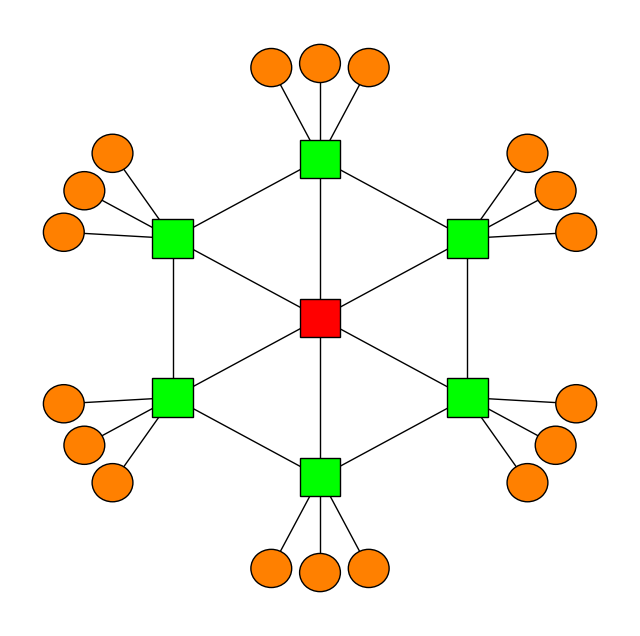

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_graph_grouped(num_green, num_orange_per_green, outer_radius, inner_radius, group_spread=0.18, square_size=0.2, circle_size=0.5, center_size=0.4):
    G = nx.Graph()

    # Central node (red square)
    center_position = {"C": (0, 0)}

    # Green nodes (inner circle)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green, endpoint=False)
    green_positions = {
        f"R{i}": (inner_radius * np.cos(angle), inner_radius * np.sin(angle))
        for i, angle in enumerate(angles)
    }

    # Connect central node `C` with all green nodes `R`
    for key in green_positions:
        G.add_edge("C", key)

    # Orange nodes (outer circle)
    orange_positions = {}
    for i, angle in enumerate(angles):
        if num_orange_per_green == 1:
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_0"] = (ox, oy)
            # G.add_edge(f"G{i}_0", f"R{i}")  
        elif num_orange_per_green <= 3:
            # sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_red)
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_green)  # Adjust spacing
            for j, offset in enumerate(sub_angles):
                ox = outer_radius * np.cos(angle + offset)
                oy = outer_radius * np.sin(angle + offset)
                orange_positions[f"G{i}_{j}"] = (ox, oy)
                G.add_edge(f"G{i}_{j}", f"R{i}")  
        else:
            # Combine multiple orange nodes into one with a number inside
            ox = outer_radius * np.cos(angle)  
            oy = outer_radius * np.sin(angle)
            orange_positions[f"G{i}_sum"] = (ox, oy)
            G.add_edge(f"G{i}_sum", f"R{i}")  

    # Connect green nodes (inner circle) in sequence
    green_keys = list(green_positions.keys())
    for i in range(num_green):
        G.add_edge(green_keys[i], green_keys[(i + 1) % num_green])

    pos = {**center_position, **green_positions, **orange_positions}

    # Create figure with correct aspect ratio
    fig, ax = plt.subplots(figsize=(8, 8))  

    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)

    # Draw central red square
    for key, (x, y) in center_position.items():
        square = patches.Rectangle((x - center_size / 2, y - center_size / 2), center_size, center_size,
                                   facecolor="red", edgecolor="black", linewidth=1, zorder=3)
        ax.add_patch(square)

    # Draw green squares (nodes `R`)
    for key, (x, y) in green_positions.items():
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor=(0/255, 255/255, 0/255), edgecolor="black", linewidth=1, zorder=3)
        ax.add_patch(square)

    # Draw orange circles (nodes `G`)  
    for key, (x, y) in orange_positions.items():
        if key.endswith("_sum"):
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)
            ax.text(x, y, str(num_orange_per_green), color="black", fontsize=10, ha="center", va="center",
                    fontweight="bold", zorder=5)
        else:
            circle = patches.Circle((x, y), circle_size, facecolor=(255/255, 128/255, 0/255), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)

    return fig

# Function to save graph in different formats (PDF, PNG, SVG)
def save_graph(fig, filename, format="pdf", dpi=300):
    filepath = f"{filename}.{format}"
    
    # Set correct size before saving to avoid distortions
    fig.set_size_inches(8, 8)  
    
    fig.savefig(filepath, format=format, dpi=dpi, bbox_inches="tight")  
    print(f"Graph saved as {filepath}")

# Example usage
fig = draw_graph_grouped(num_green=6, num_orange_per_green=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.2)

# Save in PDF, PNG, and SVG formats
save_graph(fig, "graph_output", format="pdf")
save_graph(fig, "graph_output", format="png")
save_graph(fig, "graph_output", format="svg")

Graph saved as graph_output.pdf
Graph saved as graph_output.png
Graph saved as graph_output.svg


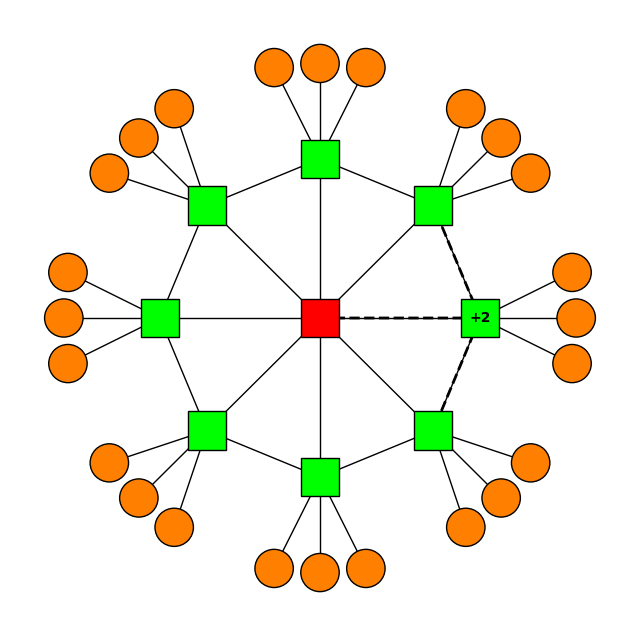

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
   
def draw_graph_grouped(num_green, num_orange_per_green, outer_radius, inner_radius, group_spread=0.18, square_size=0.2, circle_size=0.5, center_size=0.4):
    G = nx.Graph()

    # Центральный узел (красный квадрат)
    center_position = {"C": (0, 0)}

    # Ограничение на количество отображаемых зеленых узлов
    max_display_green_nodes = 8
    green_positions = {}
    num_green2= num_green  # Сохраняем оригинальное количество зеленых узлов

    if num_green > max_display_green_nodes:
        num_green2 = max_display_green_nodes


    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green2, endpoint=False)

    # Зеленые узлы (внутренний круг)
    for i, angle in enumerate(angles):
        green_positions[f"R{i}"] = (inner_radius * np.cos(angle), inner_radius * np.sin(angle))

    # Если зеленых узлов больше max_display_green_nodes, добавляем правый квадрат с числом дополнительных узлов
    extra_count = 0
    if num_green > max_display_green_nodes:
        extra_count = num_green - max_display_green_nodes
        right_angle = 0  # Угол для правого узла
        # green_positions["R_extra"] = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle))
        green_positions["R_extra_label"] = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle), extra_count)

    # Связываем центральный узел `C` с зелеными узлами `R`
    for key in green_positions:
        if "_label" not in key:
            G.add_edge("C", key)

    # Оранжевые узлы (внешний круг)
    orange_positions = {}
    for i, angle in enumerate(angles):
        sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_green)
        for j, offset in enumerate(sub_angles):
            ox = outer_radius * np.cos(angle + offset)
            oy = outer_radius * np.sin(angle + offset)
            orange_positions[f"G{i}_{j}"] = (ox, oy)
            G.add_edge(f"G{i}_{j}", f"R{i}")

    # Соединяем зеленые узлы между собой (образуют внутреннее кольцо)
    green_keys = [key for key in green_positions.keys() if "_label" not in key]
    for i in range(len(green_keys)):
        G.add_edge(green_keys[i], green_keys[(i + 1) % len(green_keys)])

    pos = {**center_position, **green_positions, **orange_positions}

    # Создаем фигуру с правильным соотношением сторон
    fig, ax = plt.subplots(figsize=(8, 8))

    # Рисуем граф
    nx.draw(G, pos, node_size=500, edge_color="black", ax=ax)

    # Рисуем центральный красный квадрат
    for key, (x, y) in center_position.items():
        square = patches.Rectangle((x - center_size / 2, y - center_size / 2), center_size, center_size,
                                   facecolor="red", edgecolor="black", linewidth=1, zorder=3)
        ax.add_patch(square)

    # Рисуем зеленые квадраты (узлы `R`)
    for key, value in green_positions.items():
        if "_label" in key:
            x, y, extra_count = value
            ax.text(x, y, f"+{extra_count}", color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
        else:
            x, y = value
            square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                       facecolor=(0 / 255, 255 / 255, 0 / 255), edgecolor="black", linewidth=1, zorder=3)
            ax.add_patch(square)

    # Рисуем оранжевые кружки (узлы `G`)
    for key, (x, y) in orange_positions.items():
        circle = patches.Circle((x, y), circle_size, facecolor=(255 / 255, 128 / 255, 0 / 255), edgecolor="black", linewidth=1, zorder=4)
        ax.add_patch(circle)

    # Если есть правый квадрат, рисуем пунктирную линию
    if extra_count > 0:
        x1, y1 = center_position["C"]
        x2, y2 = green_positions["R6"]
        x3, y3 = green_positions["R5"]
        x4, y4 = green_positions["R7"]

        ax.plot([x1, x2, x3], [y1, y2, y3], color="black", linestyle="dashed", linewidth=2)
        ax.plot([x2, x4], [y2, y4], color="black", linestyle="dashed", linewidth=2)


    # plt.show()
    return fig
# Function to save graph in different formats (PDF, PNG, SVG)
def save_graph(fig, filename, format="pdf", dpi=300):
    filepath = f"{filename}.{format}"
    
    # Set correct size before saving to avoid distortions
    fig.set_size_inches(8, 8)  
    
    fig.savefig(filepath, format=format, dpi=dpi, bbox_inches="tight")  
    print(f"Graph saved as {filepath}")

# Example usage
fig = draw_graph_grouped(num_green=10, num_orange_per_green=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.2)

# Save in PDF, PNG, and SVG formats
save_graph(fig, "graph_output", format="pdf")
save_graph(fig, "graph_output", format="png")
save_graph(fig, "graph_output", format="svg")